In [ ]:
# Google ColabへTa-Libをインストール
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
 
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2021-05-11 07:33:18--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-05-11 07:33:18--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-05-11 07:33:18--  https://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixnap

In [ ]:
!pip install https://github.com/matplotlib/mplfinance/archive/master.zip

In [ ]:
!pip install mpl_finance

In [ ]:
# データ処理のライブラリ
import pandas as pd
import numpy as np 
import datetime
 
# Matplotlibのインポート
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.dates as mdates 
import mpl_finance as mpf

In [ ]:
# Talibのインポート
import talib as ta
ta.get_function_groups

<function talib.get_function_groups>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
masta = pd.read_csv('/content/drive/My Drive/Colab Notebooks/usd_10min_api.csv')
df = masta.copy()

Mounted at /content/drive


In [ ]:
# データの日付をIndexとして使う
df.index = pd.to_datetime(df.time)
 
# 不要なカラムの削除
del df['time']
del df['Unnamed: 0']

In [ ]:
# データフレームの最初の5行を表示
df.head()

,close,open,high,low,volume
time,,,,,
2018-03-01 15:40:00,106.792,106.817,106.817,106.777,87
2018-03-01 15:50:00,106.766,106.796,106.796,106.738,111
2018-03-01 16:00:00,106.774,106.769,106.822,106.762,232
2018-03-01 16:10:00,106.815,106.777,106.828,106.765,154
2018-03-01 16:20:00,106.844,106.813,106.864,106.809,207


In [ ]:
# OHLCデータをNumpy配列へ変換
o = np.array(df['open'])
c = np.array(df['close'])
l = np.array(df['low'])
h = np.array(df['high'])
# 4種類のローソク足パターンを抽出
df['Marubozu'] = ta.CDLMARUBOZU(o, h, l, c)
df['Engulfing_Pattern'] = ta.CDLENGULFING(o, h, l, c)
df['Hammer'] = ta.CDLHAMMER(o, h, l, c)
df['Dragonfly_Doji'] = ta.CDLDRAGONFLYDOJI(o, h, l, c)
df

,close,open,high,low,volume,Marubozu,Engulfing_Pattern,Hammer,Dragonfly_Doji
time,,,,,,,,,
2018-03-01 15:40:00,106.792,106.817,106.817,106.777,87,0,0,0,0
2018-03-01 15:50:00,106.766,106.796,106.796,106.738,111,0,0,0,0
2018-03-01 16:00:00,106.774,106.769,106.822,106.762,232,0,0,0,0
2018-03-01 16:10:00,106.815,106.777,106.828,106.765,154,0,0,0,0
2018-03-01 16:20:00,106.844,106.813,106.864,106.809,207,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2018-08-10 15:30:00,111.038,110.936,111.050,110.936,453,0,0,0,0
2018-08-10 15:40:00,111.052,111.035,111.150,111.035,385,0,0,0,0
2018-08-10 15:50:00,111.013,111.054,111.060,110.991,376,0,-100,0,0


In [ ]:
df[(df['Marubozu'] < 0) | (df['Marubozu'] > 0)].head()

,close,open,high,low,volume,Marubozu,Engulfing_Pattern,Hammer,Dragonfly_Doji
time,,,,,,,,,
2018-03-01 17:20:00,106.803,106.887,106.887,106.798,171,-100,0,0,0
2018-03-01 18:00:00,106.706,106.777,106.777,106.702,220,-100,0,0,0
2018-03-02 03:30:00,106.713,106.768,106.768,106.710,499,-100,0,0,0
2018-03-02 06:20:00,106.234,106.293,106.293,106.232,92,-100,0,0,0
2018-03-02 08:00:00,106.149,106.114,106.150,106.114,180,100,0,0,0


In [ ]:
# 丸坊主のカウントを確認
df['Marubozu'][(df['Marubozu'] < 0) | (df['Marubozu'] > 0)].count()

983

In [ ]:
#df['Marubozu'].loc['2018-03-09 08:10:00']
df[df.index=='2018-03-09 08:10:00']

,close,open,high,low,volume,Marubozu,Engulfing_Pattern,Hammer,Dragonfly_Doji
time,,,,,,,,,
2018-03-09 08:10:00,106.383,106.311,106.383,106.307,156,100,0,0,0


In [ ]:
def candlechart(data, width=0.8):
    fig, ax = plt.subplots()
 
    # ローソク足
    mpf.candlestick2_ohlc(ax, opens=data.open.values, closes=data.close.values,
                          lows=data.low.values, highs=data.high.values,
                          width=width, colorup='r', colordown='b')
 
    xdate = data.index
    ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
 
    def mydate(x, pos):
        try:
            return xdate[int(x)]
        except IndexError:
            return ''
 
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))
    ax.format_xdata = mdates.DateFormatter('%m-%d')
 
    fig.autofmt_xdate()
    fig.tight_layout()
 
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0eaffc6910>)

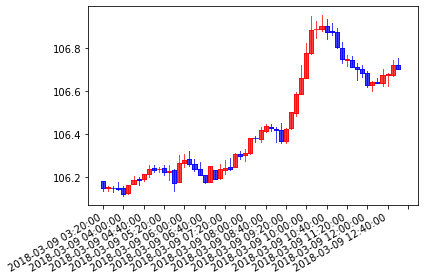

In [ ]:
# 丸坊主 陽線（上昇トレンドが力強い）
set_time = datetime.datetime.strptime('2018-03-09 08:10:00', '%Y-%m-%d %H:%M:%S')
before = set_time - datetime.timedelta(hours=5)
after = set_time + datetime.timedelta(hours=5)
candlechart(df.loc[(df.index > before )&(df.index < after)])

In [ ]:
df[(df['Engulfing_Pattern'] < 0) | (df['Engulfing_Pattern'] > 0)].head()

,close,open,high,low,volume,Marubozu,Engulfing_Pattern,Hammer,Dragonfly_Doji
time,,,,,,,,,
2018-03-01 18:50:00,106.769,106.740,106.775,106.732,186,0,100,0,0
2018-03-01 19:40:00,106.780,106.792,106.807,106.765,121,0,-100,0,0
2018-03-01 20:00:00,106.786,106.773,106.802,106.770,104,0,100,0,0
2018-03-01 21:00:00,106.726,106.682,106.734,106.680,122,0,100,0,0
2018-03-01 21:40:00,106.793,106.752,106.801,106.729,161,0,100,0,0


In [ ]:
df['Engulfing_Pattern'][(df['Engulfing_Pattern'] < 0) | (df['Engulfing_Pattern'] > 0)].count()

1686

In [ ]:
df[df.index=='2018-03-12 18:40:00']

,close,open,high,low,volume,Marubozu,Engulfing_Pattern,Hammer,Dragonfly_Doji
time,,,,,,,,,
2018-03-12 18:40:00,106.537,106.511,106.566,106.508,133,0,100,0,0


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ea67f0390>)

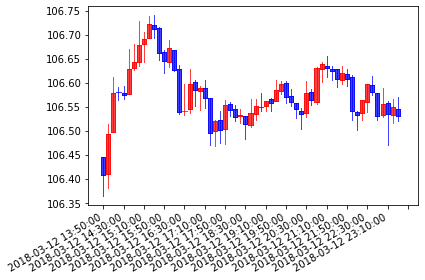

In [34]:
#包み足
set_time = datetime.datetime.strptime('2018-03-12 18:40:00', '%Y-%m-%d %H:%M:%S')
before = set_time - datetime.timedelta(hours=5)
after = set_time + datetime.timedelta(hours=5)
candlechart(df.loc[(df.index > before )&(df.index < after)])